In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
# Summary of N/A Values
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

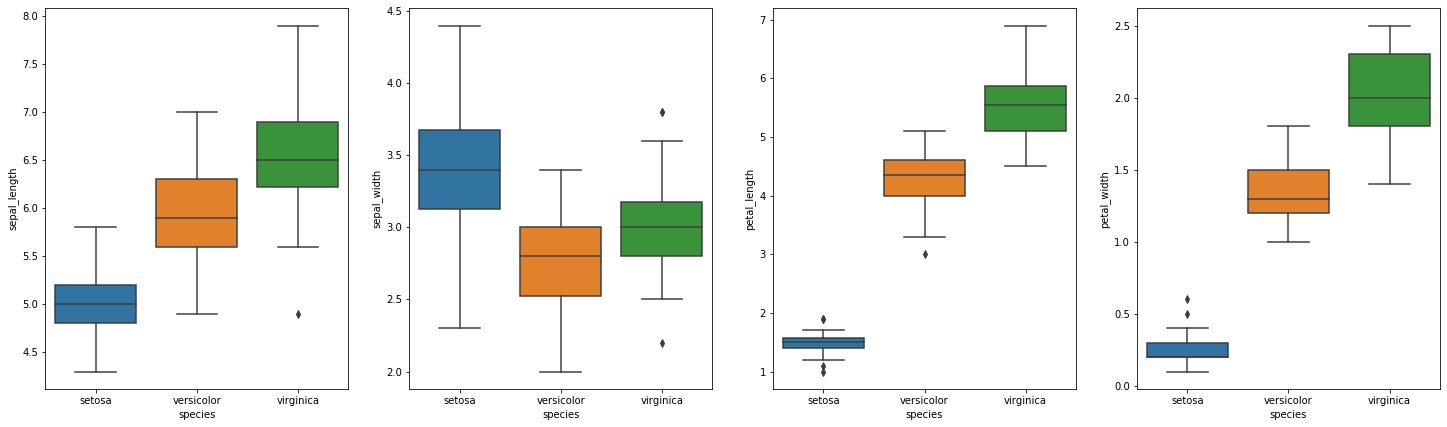

In [5]:
# Boxplot of Features

fig,ax=plt.subplots(nrows=1 ,ncols=4)

sns.boxplot(data=dataset,y='sepal_length',x='species',ax=ax[0])
sns.boxplot(data=dataset,y='sepal_width',x='species',ax=ax[1])
sns.boxplot(data=dataset,y='petal_length',x='species',ax=ax[2])
sns.boxplot(data=dataset,y='petal_width',x='species',ax=ax[3])
fig.set_figwidth(25)
fig.set_figheight(7)

Class Split
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


Text(0, 0.5, 'Count')

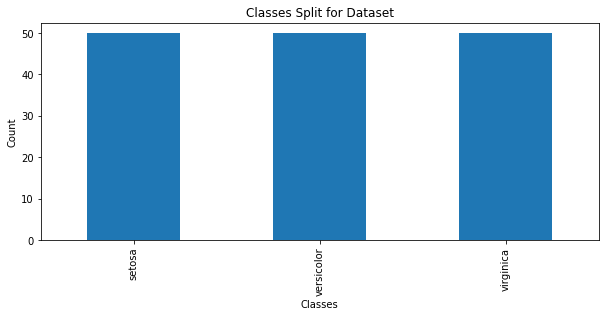

In [6]:
# Class Balance
print('Class Split')
print(dataset['species'].value_counts())
dataset['species'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

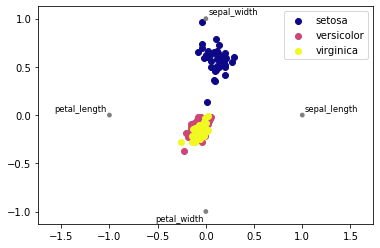

In [7]:
# Multidimensional dataset in 2D. 
# Colors can be found at https://matplotlib.org/users/colormaps.html
from pandas.plotting import radviz
radviz(dataset, 'species',colormap='plasma')

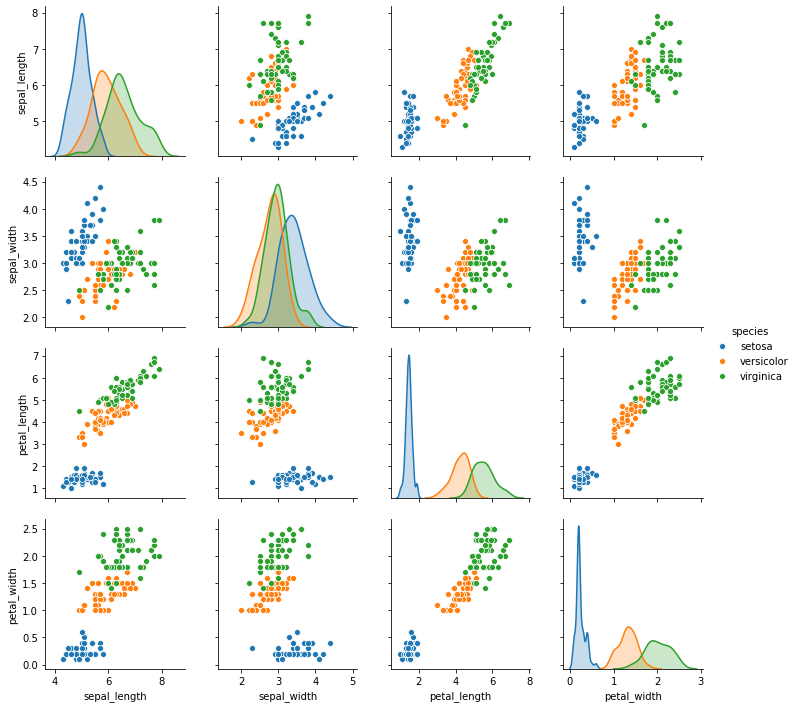

In [8]:
# Visualization of All Variables
pairplot = sns.pairplot(dataset, hue="species")
pairplot

In [9]:
# Review Correlation between Variables
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


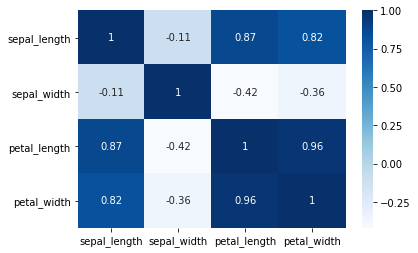

In [10]:
# Visualiztion of Correlations
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [11]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('petal_length', 'sepal_length'), ('petal_width', 'sepal_length'), ('petal_width', 'petal_length')]


In [21]:
# Prepare for Models for Comparison

#Create x and y variables
x = dataset.drop('species', axis=1).values
Y = dataset['species'].values

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

#Import Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_gnb = Pipeline([('scl', StandardScaler()),
                    ('clf', GaussianNB())])

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_jobs=-1))])

In [14]:
# Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8, 1.01])
    plt.show()

GNB Learning Curve


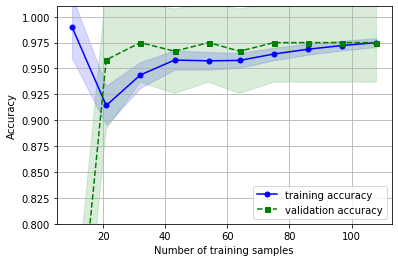


 k-NN Learning Curve


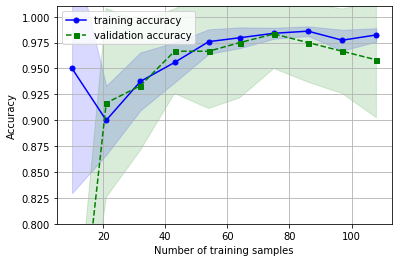

In [15]:
# Plot Learning Curve
print('GNB Learning Curve')
plot_learning_curves(pipe_gnb)
print('\n k-NN Learning Curve')
plot_learning_curves(pipe_knn)

In [16]:
# Set grid search params 

#GNB (Note: GNB has no optimizing paramaters)
param_gridgnb = {}

#k-NN
param_range_k = range(1, 10) 
param_gridknn = {'clf__n_neighbors':param_range_k}

#Optimize Models 

opt_gnb = GridSearchCV(estimator=pipe_gnb, param_grid=param_gridgnb,
                       cv=10, verbose=0,scoring='accuracy',n_jobs=-1)

opt_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_gridknn,
                       cv=10, verbose=0,scoring='accuracy',n_jobs=-1)

# List of pipelines for ease of iteration 
grids = [opt_gnb,opt_knn] 

# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0:'gnb',1: 'kNN'}

In [17]:
# Create Confusion Matrix Table and Report
from sklearn.metrics import classification_report, confusion_matrix  

for idx, gs in enumerate(grids):
    
    #Fit grid search
    gs.fit(x_train2, y_train)
    # Predict on test data with best params 
    y_pred2 = gs.predict(x_test2) 
    
    #Create Dataframe to Compare Models
    target_names=['setosa','versicolor','virginica']
    print('\nEstimator: {}'.format(grid_dict[idx])) 
    print('\nBest Parameters:',str(gs.best_params_))
    print('\n', confusion_matrix(y_test,y_pred2))  
    print(classification_report(y_test,y_pred2,target_names=target_names))    


Estimator: gnb

Best Parameters: {}

 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Estimator: kNN

Best Parameters: {'clf__n_neighbors': 7}

 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [18]:
# Prediction Dataset
                   
raw_data = {'sepal_length':[7.1],'sepal_width':[4.0],'petal_length':[3.1],
            'petal_width':[1.5]}

dfnew=pd.DataFrame(raw_data, columns = ['sepal_length', 'sepal_width',
                                        'petal_length', 'petal_width'])

dfnew

,sepal_length,sepal_width,petal_length,petal_width
0,7.1,4.0,3.1,1.5


In [19]:
# Prediction
print('Prediction GNB:',opt_gnb.predict(dfnew))
print('Prediction kNN:',opt_knn.predict(dfnew))

Prediction GNB: ['virginica']
Prediction kNN: ['virginica']
